In [1]:
import mtcnn
from mtcnn import MTCNN

import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pprint import pprint

In [2]:
# import tensorflow as tf
# from tensorflow.compat.v1.keras.backend import set_session
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth=True   #不全部佔滿顯示記憶體, 按需分配
# set_session(tf.compat.v1.Session(config=config))

In [3]:
path = './5celeb/data/*/*/*.jpg'

In [4]:
img_paths = glob(path)
len(glob(path))

118

In [5]:
detector = MTCNN()

[{'box': [28, 43, 93, 126],
  'confidence': 0.9995989203453064,
  'keypoints': {'left_eye': (53, 89),
                'mouth_left': (53, 140),
                'mouth_right': (91, 141),
                'nose': (71, 117),
                'right_eye': (96, 91)}}]


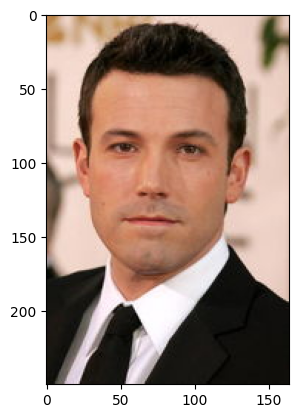

In [6]:
index = 1
# img = cv2.imread(img_paths[index])[:, :, ::-1]
img = cv2.imread(img_paths[index])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = detector.detect_faces(img)
pprint(results)

plt.imshow(img)

In [7]:
results

[{'box': [28, 43, 93, 126],
  'confidence': 0.9995989203453064,
  'keypoints': {'left_eye': (53, 89),
   'right_eye': (96, 91),
   'nose': (71, 117),
   'mouth_left': (53, 140),
   'mouth_right': (91, 141)}}]

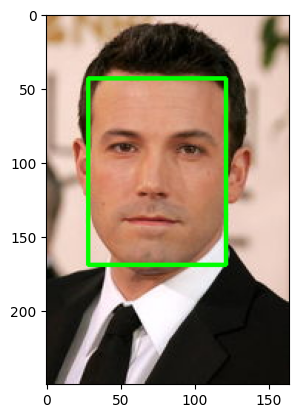

In [8]:
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height
img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(img)


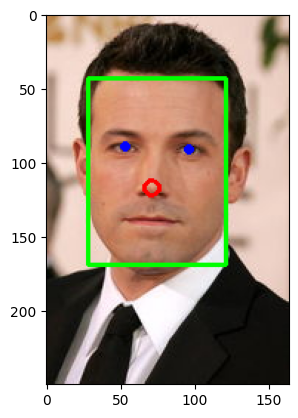

In [9]:
eye_l_x, eye_l_y = results[0]['keypoints']['left_eye']
eye_r_x, eye_r_y = results[0]['keypoints']['right_eye']
img = cv2.circle(img, (eye_l_x, eye_l_y),2 , (0, 0, 255), 2)
img = cv2.circle(img, (eye_r_x, eye_r_y),2 , (0, 0, 255), 2)

n_x, n_y = results[0]['keypoints']['nose']
img = cv2.circle(img, (n_x, n_y), 5, (255, 0, 0), 2)

plt.imshow(img)